In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Overview
### 1. MRW file

In [62]:
xls = pd.ExcelFile('dataset/MRW_v2.xlsx')
sheet1 = pd.read_excel(xls, 'Transaction')
sheet2 = pd.read_excel(xls, 'SKU_point_Ltr')
sheet3 = pd.read_excel(xls, 'Garange Profile')
sheet4 = pd.read_excel(xls, 'User')

In [65]:
print(sheet1.shape)
# sheet1.sample(5)

(215656, 5)


In [50]:
sheet1_clean = sheet1.groupby(['Distributor', 'UserId', 'ScanDate', 'ProductName', 'ProductSKU']).agg({'ScanDate': 'count'})\
                            .rename(columns={'ScanDate': 'Qty'}).reset_index()
sheet1_clean.head()

,Distributor,UserId,ScanDate,ProductName,ProductSKU,Qty
0,A,EXL_1569941239614,2023-01-11,Mobil 1 Gold,Mobil 1 Gold 4L - 6L,2
1,A,EXL_1569941239614,2023-01-11,Silver Large,Silver - Large 4L,2
2,A,EXL_1569941239614,2023-01-14,Silver Large,Silver - Large 4L,1
3,A,EXL_1569941239614,2023-02-06,Silver Large,Silver - Large 4L,5
4,A,EXL_1569941239614,2023-02-07,Gold Large,Gold - Large 4L,1


In [60]:
# validation
sheet1_clean[sheet1_clean['UserId'] == 'EXL_1692444744991']

,Distributor,UserId,ScanDate,ProductName,ProductSKU,Qty
21474,B,EXL_1692444744991,2023-08-19,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,1
21475,B,EXL_1692444744991,2023-08-22,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,1
21476,B,EXL_1692444744991,2023-08-24,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,18
21477,B,EXL_1692444744991,2023-11-29,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,12


In [68]:
print(sheet2.shape)
# sheet2.head()

(10, 3)


In [69]:
print(sheet3.shape)
# sheet3.head()

(4006, 5)


In [70]:
print(sheet4.shape)
# sheet4.head()

(4719, 3)


In [118]:
merge_1 = pd.merge(sheet1_clean, sheet2, on='ProductSKU', how='left')
merge_2 = pd.merge(merge_1, sheet3, left_on=['UserId', 'Distributor'], right_on=['OwnerId', 'Distributor'], 
                   how='left')
mrw = pd.merge(merge_2, sheet4, on='UserId', how='left')

In [119]:
print(mrw.shape)
mrw.head()

(36015, 14)


,Distributor,UserId,ScanDate,ProductName,ProductSKU,Qty,Points,Volume (L),OwnerId,Postcode,Province,District,GarageId,UserType
0,A,EXL_1569941239614,2023-01-11,Mobil 1 Gold,Mobil 1 Gold 4L - 6L,2,60,6,EXL_1569941239614,10540.0,สมุทรปราการ,เขตบางพลี,XT8304,Owner
1,A,EXL_1569941239614,2023-01-11,Silver Large,Silver - Large 4L,2,50,4,EXL_1569941239614,10540.0,สมุทรปราการ,เขตบางพลี,XT8304,Owner
2,A,EXL_1569941239614,2023-01-14,Silver Large,Silver - Large 4L,1,50,4,EXL_1569941239614,10540.0,สมุทรปราการ,เขตบางพลี,XT8304,Owner
3,A,EXL_1569941239614,2023-02-06,Silver Large,Silver - Large 4L,5,50,4,EXL_1569941239614,10540.0,สมุทรปราการ,เขตบางพลี,XT8304,Owner
4,A,EXL_1569941239614,2023-02-07,Gold Large,Gold - Large 4L,1,50,4,EXL_1569941239614,10540.0,สมุทรปราการ,เขตบางพลี,XT8304,Owner


Handle null/ missing values

In [73]:
mrw.columns

Index(['Distributor', 'UserId', 'ScanDate', 'ProductName', 'ProductSKU', 'Qty',
       'Points', 'Volume (L)', 'OwnerId', 'Postcode', 'Province', 'District ',
       'GarageId', 'UserType'],
      dtype='object')

In [74]:
mrw.dtypes

Distributor            object
UserId                 object
ScanDate       datetime64[ns]
ProductName            object
ProductSKU             object
Qty                     int64
Points                  int64
Volume (L)              int64
OwnerId                object
Postcode              float64
Province               object
District               object
GarageId               object
UserType               object
dtype: object

In [75]:
mrw.rename(columns={'District ': 'District'}, inplace=True)
mrw.isnull().sum()

Distributor       0
UserId            0
ScanDate          0
ProductName       0
ProductSKU        0
Qty               0
Points            0
Volume (L)        0
OwnerId        3649
Postcode       3757
Province       3649
District       3649
GarageId          0
UserType          0
dtype: int64

In [76]:
# drop records with no province
# null_province = mrw[ mrw['Province'].isnull() ].index
# mrw.drop(index=null_province, inplace=True)

In [114]:
# fill null Postcode with 0
mrw['Postcode'] = mrw['Postcode'].fillna(0).astype('int')
mrw['Postcode'] = mrw['Postcode'].astype('str').replace('0', '-')

In [117]:
mrw[mrw['Postcode'] == '-']

,Distributor,UserId,ScanDate,ProductName,ProductSKU,Qty,Points,Volume (L),OwnerId,Postcode,Province,District,GarageId,UserType
13663,A,EXL_1647007533124,2023-01-03,Mobil Super FF,Mobil Super FF 4L - 7L,1,35,6,EXL_1647007533124,-,สระบุรี,เขตหนองแค,IM8971,Owner
13664,A,EXL_1647007533124,2023-01-16,Mobil Delvac Modern,Mobil Delvac Modern 7L,1,20,7,EXL_1647007533124,-,สระบุรี,เขตหนองแค,IM8971,Owner
13665,A,EXL_1647007533124,2023-01-28,Mobil Delvac Modern,Mobil Delvac Modern 7L,1,20,7,EXL_1647007533124,-,สระบุรี,เขตหนองแค,IM8971,Owner
13666,A,EXL_1647007533124,2023-01-31,Mobil Delvac Modern,Mobil Delvac Modern 7L,1,20,7,EXL_1647007533124,-,สระบุรี,เขตหนองแค,IM8971,Owner
13667,A,EXL_1647007533124,2023-02-03,Mobil Delvac Modern,Mobil Delvac Modern 7L,1,20,7,EXL_1647007533124,-,สระบุรี,เขตหนองแค,IM8971,Owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30872,C,EXL_1694432358157,2023-11-28,Mobil Super FF,Mobil Super FF 4L - 7L,20,35,6,EXL_1694432358157,-,เพชรบูรณ์,เขตหนองไผ่,QW7361,Owner
30873,C,EXL_1694432358157,2023-12-11,Mobil Super FF,Mobil Super FF 4L - 7L,1,35,6,EXL_1694432358157,-,เพชรบูรณ์,เขตหนองไผ่,QW7361,Owner
31048,C,EXL_1701941308532,2023-12-07,Mobil Delvac Legend,Mobil_Delvac_Legend_6L_-_7L,3,10,7,EXL_1701941308532,-,กำแพงเพชร,เขตเมืองกำแพงเพชร,LL3399,Owner
31049,C,EXL_1701941308532,2023-12-07,Mobil Super FF,Mobil Super FF 4L - 7L,4,35,6,EXL_1701941308532,-,กำแพงเพชร,เขตเมืองกำแพงเพชร,LL3399,Owner


### EDA
Distribution of Top10 garage order

In [98]:
mrw[ mrw['GarageId'] == 'DN4920' ].shape

(21, 14)

In [103]:
garage_order = mrw.groupby(['GarageId', 'ScanDate']).agg({'Qty': 'sum'}).reset_index()
top10_garage = garage_order.sort_values('Qty', ascending=False).head(10)
top10_garage = top10_garage['GarageId']

Text(0.5, 1.0, 'Top10 Garage Order Distribution')

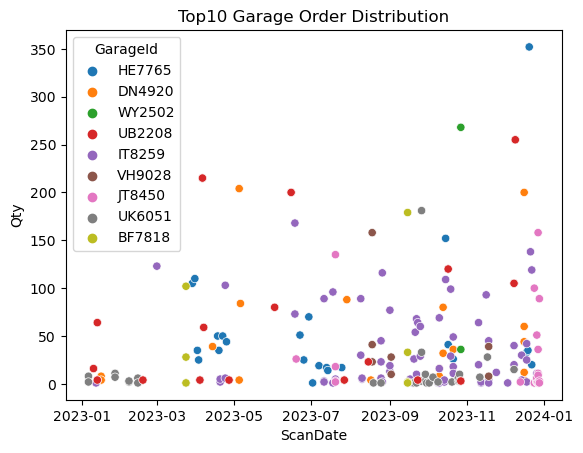

In [105]:
top10_garage_order = pd.merge(top10_garage, mrw, on='GarageId', how='left')
sns.scatterplot(data=top10_garage_order, x='ScanDate', y='Qty', hue='GarageId')
plt.title('Top10 Garage Order Distribution')

In [162]:
product_per_garage = top10_garage_order[['GarageId', 'ProductSKU', 'Qty', 'Province']]\
                        .groupby(['GarageId', 'ProductSKU'])\
                        .agg({'Qty': 'sum'}).apply(lambda x: np.sort(x))

product_per_garage

Qty
GarageId ProductSKU                       
BF7818   Charcoal - Large 4L - 5L        1
         Mobil 1 Gold 4L - 6L            1
         Mobil Delvac Modern 7L          1
         Mobil Super AIO - 7L            1
         Mobil Super AIO 3L - 6L         3
         Mobil Super FF 4L - 7L          4
DN4920   Charcoal - Large 4L - 5L        4
         Gold - Large 4L                 4
         Mobil 1 Gold 4L - 6L            7
         Mobil Delvac Modern 7L         12
         Mobil Super AIO - 7L           13
         Mobil Super FF 4L - 7L         13
         Mobil_Delvac_Legend_6L_-_7L    19
         Silver - Large 4L              24
HE7765   Mobil Super FF 4L - 7L         31
IT8259   Gold - Large 4L                36
         Mobil 1 Gold 4L - 6L           46
         Mobil Super FF 4L - 7L         51
         Silver - Large 4L              54
JT8450   Charcoal - Large 4L - 5L       60
         Gold - Large 4L                61
         Mobil 1 Gold 4L - 6L           66
         Mobil Delvac Modern 7L         88
         Mobil Super AIO - 7L           90
         Mobil Super FF 4L - 7L        128
         Mobil_Delvac_Legend_6L_-_7L   144
UB2208   Mobil Super AIO - 7L          200
         Mobil Super FF 4L - 7L        225
         Mobil_Delvac_Legend_6L_-_7L   268
UK6051   Mobil Delvac Modern 7L        280
         Mobil Super AIO - 7L          281
         Mobil Super FF 4L - 7L        336
VH9028   Charcoal - Large 4L - 5L      403
         Mobil Super AIO - 7L          559
         Mobil Super FF 4L - 7L       1327
WY2502   Mobil Delvac Modern 7L       2022
         Mobil Super FF 4L - 7L       2228

Proportional product SKU

In [123]:
sku_qty_totals = mrw.groupby('ProductSKU').agg({'Qty': 'sum'}).reset_index()
sku_qty_totals = sku_qty_totals.sort_values(by='Qty', ascending=False).reset_index(drop=True)

sku_qty_totals

,ProductSKU,Qty
0,Mobil Super FF 4L - 7L,137394
1,Mobil Delvac Modern 7L,24739
2,Silver - Large 4L,12689
3,Mobil Super AIO - 7L,12618
4,Charcoal - Large 4L - 5L,11730
5,Mobil_Delvac_Legend_6L_-_7L,6685
6,Gold - Large 4L,5336
7,Mobil 1 Gold 4L - 6L,3589
8,Blue - Large 4L - 5L,500
9,Mobil Super AIO 3L - 6L,376


Text(0.5, 1.0, 'Quantity Percentage of ProductSKU')

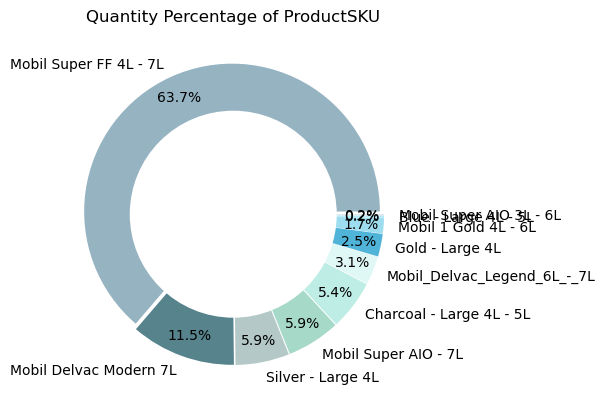

In [145]:
color = ['#96b3c2', '#57838d', '#b4c9c7', '#a7d9c9', '#beede5',
         '#e0f8f5', '#50b4d8', '#9eddef', '#b7eaf7', '#d7e2ea']
explode = (0.02, )*10

# Pie Chart
plt.pie(sku_qty_totals['Qty'], labels=sku_qty_totals['ProductSKU'],
        autopct='%1.1f%%', pctdistance=0.85, colors=color, explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Quantity Percentage of ProductSKU')

### 2. MER file

In [ ]:
mer = pd.ExcelFile('dataset/2. MER PointTransaction 2023_RetailsResellers_Final.xlsx')
mer_sheet1 = pd.read_excel(mer, 'MER Transaction')
mer_sheet2 = pd.read_excel(mer, 'Point Per Litre')

In [ ]:
print(mer_sheet1.shape)
mer_sheet1.head()

(9429, 8)


,Invoicedate,Distributor,GroupId,Type,Provincename,MatNo,Material Name,New_Volume(L)
0,2023-02-14,A,ERW_AI8N2021070006,Retails,Pathum Thani,123150,"MOBIL MULTIPURPOSE ATF, 208LT DR",7168
1,2023-04-20,D,ERW_DBG72020110082,Reseller,Songkhla,124213,MOBIL ATF 220 D 208LT,912
2,2023-10-19,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7340
3,2023-07-25,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,1640
4,2023-10-12,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7080


In [ ]:
print(mer_sheet2.shape)
mer_sheet2.head()

(145, 2)


,MatNo,Points
0,144673,10
1,140521,10
2,144473,10
3,145832,10
4,140418,10


In [ ]:
mer = pd.merge(mer_sheet1, mer_sheet2, on='MatNo', how='left')
print(mer.shape)
mer.head()

(9429, 9)


,Invoicedate,Distributor,GroupId,Type,Provincename,MatNo,Material Name,New_Volume(L),Points
0,2023-02-14,A,ERW_AI8N2021070006,Retails,Pathum Thani,123150,"MOBIL MULTIPURPOSE ATF, 208LT DR",7168,1
1,2023-04-20,D,ERW_DBG72020110082,Reseller,Songkhla,124213,MOBIL ATF 220 D 208LT,912,1
2,2023-10-19,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7340,1
3,2023-07-25,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,1640,1
4,2023-10-12,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7080,1


Null/ missing values

In [ ]:
mer.columns

Index(['Invoicedate', 'Distributor', 'GroupId', 'Type', 'Provincename',
       'MatNo', 'Material Name', 'New_Volume(L)', 'Points'],
      dtype='object')

In [ ]:
mer.isnull().sum()

Invoicedate      0
Distributor      0
GroupId          0
Type             0
Provincename     0
MatNo            0
Material Name    0
New_Volume(L)    0
Points           0
dtype: int64

Fix Typos of Material Name

In [ ]:
mat_default = mer_sheet1.sort_values(['MatNo', 'Material Name']).groupby('MatNo').head(1)\
                        .loc[:, ['MatNo', 'Material Name']].set_index('MatNo')
mat_default['Material Name'] = mat_default['Material Name'].str.replace('โมบิล', 'MOBIL')
mat_default['Material Name'] = mat_default['Material Name'].str.replace('เดลแวค', 'DELVAC')
mat_default['Material Name'] = mat_default['Material Name'].str.replace('สเปเชียล', 'SPECIAL')
mat_default.loc[ mat_default.index == 140563, 'Material Name'] = 'MOBIL DELVAC 1 GEAR OIL 75W90, 1/35LB'

mat_default.shape
# with pd.option_context('display.max_rows', None):
#     display(mat_default)

(145, 1)

In [ ]:
for i in mer['MatNo'].unique():
    mer.loc[mer['MatNo'] == i, 'Material Name'] = mat_default.loc[i, 'Material Name']
            
mer[ ['MatNo', 'Material Name']].drop_duplicates().shape

(145, 2)

In [ ]:
mer.dropna(inplace=True)
mer.isnull().any()

Invoicedate      False
Distributor      False
GroupId          False
Type             False
Provincename     False
MatNo            False
Material Name    False
New_Volume(L)    False
Points           False
dtype: bool

#### EDA
Points per อู่

In [ ]:
mer['Provincename'] = mer['Provincename'].replace('N\A', np.nan)
mer[mer['Provincename'].isnull()].head()

,Invoicedate,Distributor,GroupId,Type,Provincename,MatNo,Material Name,New_Volume(L),Points
1705,2023-11-03,A,ERW_A7QF2022060002,Retails,NaN,140043,MOBIL ATF 3309 12x1L/CAR,5392,1
1845,2023-02-13,A,ERW_A7QF2022060003,Retails,NaN,140418,MOBIL 1 TBD 5W-40 CTN 4X6L:TH,5088,10
1910,2023-02-13,A,ERW_A7QF2022060003,Retails,NaN,140521,MOBIL 1 0W-40 CTN 4X4L:SG,608,10
2260,2023-02-13,A,ERW_A7QF2022060003,Retails,NaN,142923,MOBIL SPECIAL 20W-50 CTN 4X4L:TH,6544,1
2275,2023-10-26,A,ERW_A7QF2022060003,Retails,NaN,142923,MOBIL SPECIAL 20W-50 4X4L/CAR,1104,1


In [ ]:
result = mer.groupby('Distributor')['Provincename'].apply(lambda x: list(x.unique())).reset_index()
result.columns = ['Distributor', 'Unique Provinces']
result

,Distributor,Unique Provinces
0,A,"[Pathum Thani, Chon Buri, Chachoengsao, Rayong..."
1,B,"[Kanchanaburi, Nakhon Pathom, Samut Sakhon, Ba..."
2,C,"[Sukhothai, Kamphaeng Phet, Chon Buri, Phrae, ..."
3,D,"[Songkhla, Surat Thani, Pattani, Phangnga, Phu..."


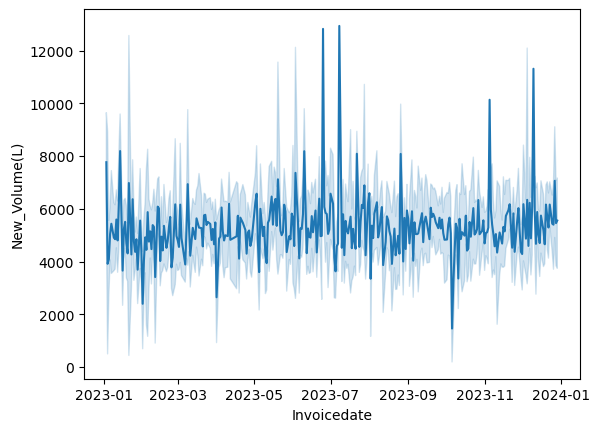

In [ ]:
# Trending of sales in mer
sns.lineplot(data=mer, x='Invoicedate', y='New_Volume(L)')
plt.show()

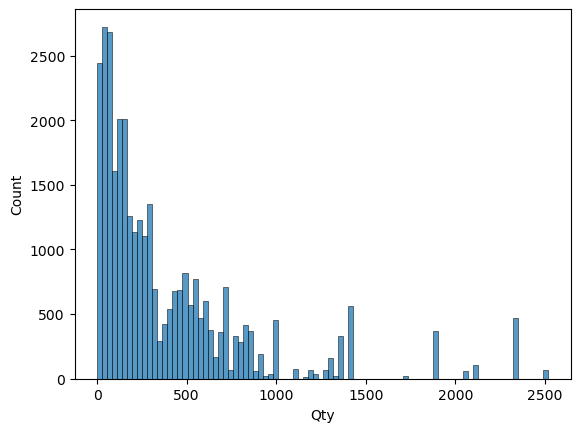

In [ ]:
# count of mrw
# sns.lineplot(data=mrw, x='ScanDate', y='count')

# order per day
sns.histplot(data=mrw, x='Qty')
plt.show()

Text(0.5, 1.0, 'User by quarter')

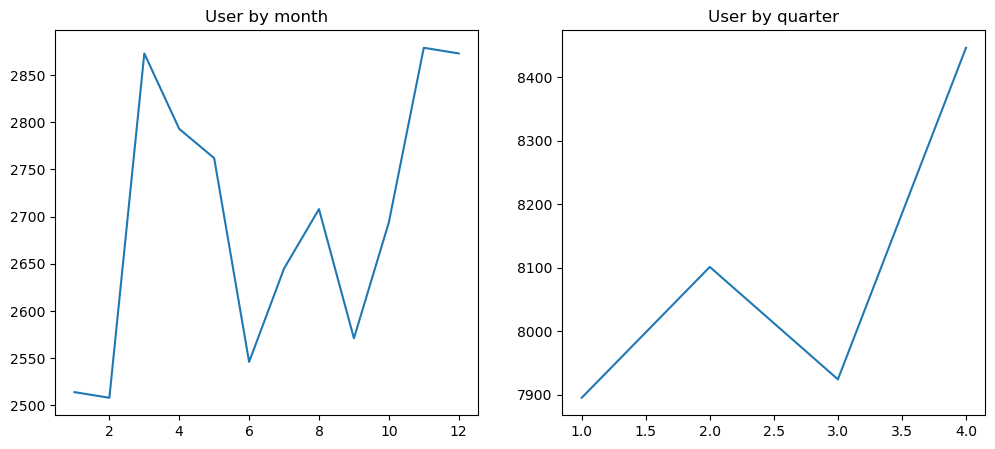

In [ ]:
time_series = mrw.copy()
time_series['Month'] = mrw['ScanDate'].dt.month
time_series['Year'] = mrw['ScanDate'].dt.year
time_series['Quarter'] = mrw['ScanDate'].dt.quarter

sales_per_month = time_series.groupby(['Year', 'Month']).agg({'UserId': 'count'}).\
                                rename(columns={'UserId': 'quantity'}).reset_index()
sales_per_quarter = time_series.groupby(['Year', 'Quarter']).agg({'UserId': 'count'})\
                                .rename(columns={'UserId': 'quantity'}).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(sales_per_month['Month'], sales_per_month['quantity'])
ax[0].set_title('User by month')

ax[1].plot(sales_per_quarter['Quarter'], sales_per_quarter['quantity'])
ax[1].set_title('User by quarter')